In [2]:
import keras
import tensorflow as tf

2023-03-30 10:27:38.859201: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-30 10:27:38.859217: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### Repetition:
Create sinum function and try to create and train your neural network model.

In [203]:
from keras.losses import MSE
from keras.layers import Dense, BatchNormalization, Dropout, Input
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.optimizers import SGD

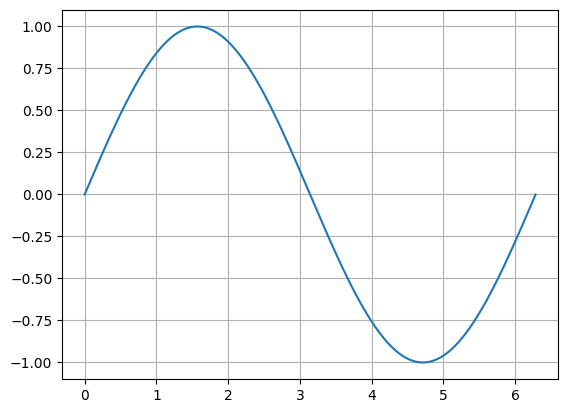

In [204]:
x_sin = np.arange(start=0, stop=2*np.pi, step=1e-3)
y_sin = np.sin(x_sin)

plt.plot(x_sin, y_sin)
plt.grid()
plt.show()

In [205]:
x_sin = x_sin.reshape(-1, 1)
y_sin = y_sin.reshape(-1, 1)

print(x_sin.shape)

(6284, 1)


In [206]:
model = Sequential()
model.add(Input(shape=(1,)))
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(1))         # Regression - no need to have activation on output

model.summary()


Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_130 (Dense)           (None, 256)               512       
                                                                 
 dense_131 (Dense)           (None, 256)               65792     
                                                                 
 dense_132 (Dense)           (None, 128)               32896     
                                                                 
 dense_133 (Dense)           (None, 64)                8256      
                                                                 
 dense_134 (Dense)           (None, 32)                2080      
                                                                 
 dense_135 (Dense)           (None, 1)                 33        
                                                                 
Total params: 109,569
Trainable params: 109,569
Non-t

In [207]:
optimizer = SGD(learning_rate=0.01)
model.compile(loss='mse', optimizer='rmsprop', metrics=['mean_squared_error'])

In [208]:
history = model.fit(x_sin, y_sin, epochs=10)

Epoch 1/10
197/197 [==============================] - 1s 2ms/step - loss: 0.2814 - mean_squared_error: 0.2814
Epoch 2/10
197/197 [==============================] - 0s 2ms/step - loss: 0.0837 - mean_squared_error: 0.0837
Epoch 3/10
197/197 [==============================] - 0s 2ms/step - loss: 0.0382 - mean_squared_error: 0.0382
Epoch 4/10
197/197 [==============================] - 0s 2ms/step - loss: 0.0175 - mean_squared_error: 0.0175
Epoch 5/10
197/197 [==============================] - 0s 2ms/step - loss: 0.0154 - mean_squared_error: 0.0154
Epoch 6/10
197/197 [==============================] - 0s 2ms/step - loss: 0.0143 - mean_squared_error: 0.0143
Epoch 7/10
197/197 [==============================] - 0s 2ms/step - loss: 0.0124 - mean_squared_error: 0.0124
Epoch 8/10
197/197 [==============================] - 0s 2ms/step - loss: 0.0112 - mean_squared_error: 0.0112
Epoch 9/10
197/197 [==============================] - 0s 2ms/step - loss: 0.0109 - mean_squared_error: 0.0109
Epoch 10/1

197/197 [==============================] - 0s 835us/step


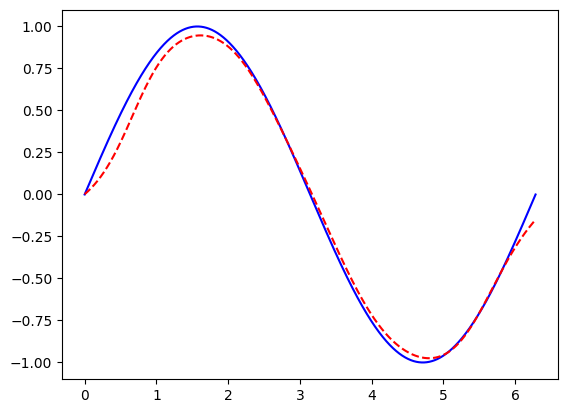

In [209]:
preds = model.predict(x_sin)
plt.plot(x_sin, y_sin, 'b', x_sin, preds, 'r--')

## CNN

In [210]:
# !wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

In [211]:
# !unzip kagglecatsanddogs_5340.zip

In [268]:
from keras.layers import Conv2D, MaxPool2D, Flatten
from keras import Model

img_input = Input(shape=(28, 28, 1))

x = Conv2D(16, 3, activation="relu")(img_input)
x = Dropout(0.25)(x)
x = MaxPool2D(2)(x)
x = Conv2D(32, 3, activation="relu")(x)
x = Dropout(0.25)(x)
x = MaxPool2D(2)(x)
x = Conv2D(64, 3, activation="relu")(x)
x = Flatten()(x)
x = Dense(512, activation="relu")(x)
outputs = Dense(10, activation="sigmoid")(x)

model = Model(inputs=img_input, outputs=outputs)

In [281]:
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import mnist
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)



In [270]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
    
train_batches = datagen.flow(x_train, y_train, batch_size=128)
validation_batches = datagen.flow(x_train, y_train, subset='validation')

In [271]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
epochs = 100

In [272]:
history = model.fit(
                    train_batches,
                    validation_data=validation_batches,
                    epochs=epochs,
                   )    

Epoch 1/100
469/469 [==============================] - 10s 21ms/step - loss: 0.2311 - accuracy: 0.9291 - val_loss: 0.0913 - val_accuracy: 0.9791
Epoch 2/100
469/469 [==============================] - 10s 21ms/step - loss: 0.0647 - accuracy: 0.9797 - val_loss: 0.0603 - val_accuracy: 0.9883
Epoch 3/100
469/469 [==============================] - 10s 21ms/step - loss: 0.0463 - accuracy: 0.9851 - val_loss: 0.0528 - val_accuracy: 0.9893
Epoch 4/100
469/469 [==============================] - 10s 21ms/step - loss: 0.0372 - accuracy: 0.9876 - val_loss: 0.0374 - val_accuracy: 0.9918
Epoch 5/100
469/469 [==============================] - 10s 21ms/step - loss: 0.0321 - accuracy: 0.9894 - val_loss: 0.0308 - val_accuracy: 0.9942
Epoch 6/100
469/469 [==============================] - 10s 21ms/step - loss: 0.0271 - accuracy: 0.9913 - val_loss: 0.0229 - val_accuracy: 0.9952
Epoch 7/100
469/469 [==============================] - 10s 21ms/step - loss: 0.0234 - accuracy: 0.9924 - val_loss: 0.0189 - val_ac

In [273]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

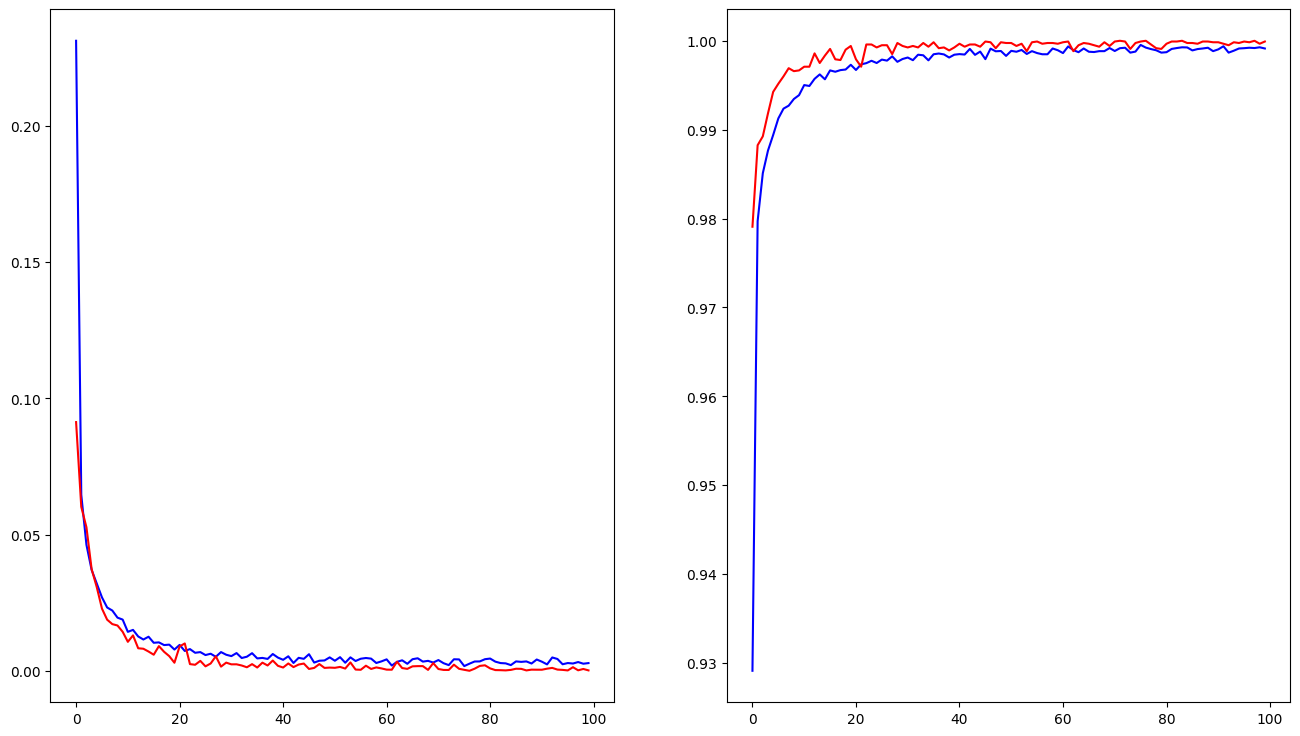

In [275]:
loss = history.history.get('loss')
val_loss = history.history.get('val_loss')

acc = history.history.get('accuracy')
val_acc = history.history.get('val_accuracy')
epoch = range(epochs)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 9))

ax1.plot(epoch, loss, 'b-', epoch, val_loss, 'r-')
ax2.plot(epoch, acc, 'b-', epoch, val_acc, 'r-')


In [283]:
y_test = np.argmax(y_test, axis=1)

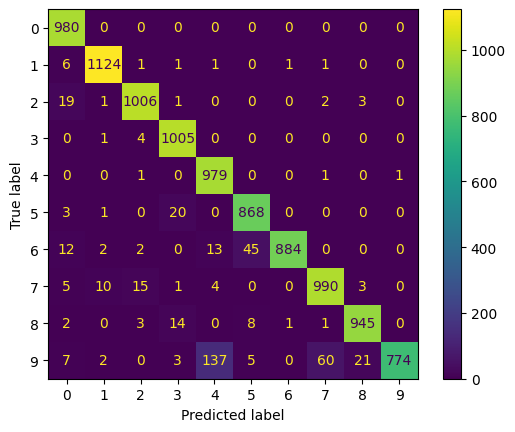

In [284]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
predictions = np.argmax(model.predict(x_test, verbose=0), axis=1)
cm = confusion_matrix(y_test, predictions)

disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [292]:
f1 = f1_score(y_test, predictions, average='macro')
print("F1 score of the NN: {:.3f}".format(f1))

F1 score of the NN: 0.954
